<h1>ENB27: revisiting FFNs</h1>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2>Pre-processing</h2>

In [2]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

In [3]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)


best perfoming ffn with flatten after input layer.

In [13]:
net1 = models.Sequential()
net1.add(layers.Dense((480), input_shape = (480,6)))
net1.add(layers.Flatten())
net1.add(layers.Dense(480,activation='relu'))
net1.add(layers.Dense(480, activation = 'relu'))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 480)               110592480 
_________________________________________________________________
dense_20 (Dense)             (None, 480)               230880    
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 3367      
Total params: 110,830,087
Trainable params: 110,830,087
Non-trainable params: 0
_________________________________________________________________


In [14]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net1.fit(train_data, train_labels, epochs = 30, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/30
52/52 [==============================] - 3s 59ms/step - loss: 7.3962 - accuracy: 0.0577 - val_loss: 14.2274 - val_accuracy: 0.1667
Epoch 2/30
52/52 [==============================] - 3s 57ms/step - loss: 15.2033 - accuracy: 0.1923 - val_loss: 13.1911 - val_accuracy: 0.1667
Epoch 3/30
52/52 [==============================] - 3s 57ms/step - loss: 12.0327 - accuracy: 0.1346 - val_loss: 7.1116 - val_accuracy: 0.1667
Epoch 4/30
52/52 [==============================] - 3s 57ms/step - loss: 5.7168 - accuracy: 0.2692 - val_loss: 6.2686 - val_accuracy: 0.1667
Epoch 5/30
52/52 [==============================] - 3s 56ms/step - loss: 4.7445 - accuracy: 0.2308 - val_loss: 5.7950 - val_accuracy: 0.1667
Epoch 6/30
52/52 [==============================] - 3s 56ms/step - loss: 4.9275 - accuracy: 0.3269 - val_loss: 4.2176 - val_accuracy: 0.1667
Epoch 7/30
52/52 [==============================] - 3s 57ms/step - loss: 2.7849 - accuracy: 0.4231 - val_l

In [15]:
test_results = net1.evaluate(test_data, test_labels)
print(test_results)

17/17 [==============================] - 0s 2ms/step
[0.6845356225967407, 0.8235294222831726]


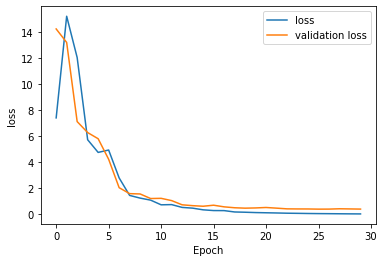

In [18]:
pp.plot_loss(hist)

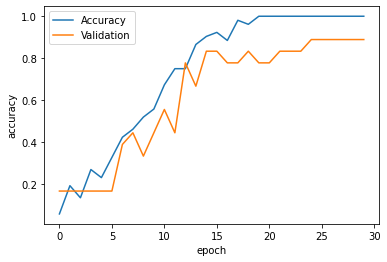

In [17]:
pp.plot_accuracy(hist)

now try with drop out

In [22]:
net2 = models.Sequential()
net2.add(layers.Dense((480), input_shape = (480,6)))
net2.add(layers.Flatten())
net2.add(layers.Dropout(0.2))
net2.add(layers.Dense(480,activation='relu'))
net2.add(layers.Dense(480, activation = 'relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_7 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 230400)            0         
_________________________________________________________________
dense_27 (Dense)             (None, 480)               110592480 
_________________________________________________________________
dense_28 (Dense)             (None, 480)               230880    
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 3367      
Total params: 110,830,087
Trainable params: 110,830,087
Non-trainable params: 0
________________________________________

In [23]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist2 = net2.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/100
52/52 [==============================] - 3s 63ms/step - loss: 9.0489 - accuracy: 0.1154 - val_loss: 21.0149 - val_accuracy: 0.1667
Epoch 2/100
52/52 [==============================] - 3s 58ms/step - loss: 21.8923 - accuracy: 0.0962 - val_loss: 22.0692 - val_accuracy: 0.1667
Epoch 3/100
52/52 [==============================] - 3s 58ms/step - loss: 21.0478 - accuracy: 0.1923 - val_loss: 10.6855 - val_accuracy: 0.2778
Epoch 4/100
52/52 [==============================] - 3s 59ms/step - loss: 9.3724 - accuracy: 0.2500 - val_loss: 2.1898 - val_accuracy: 0.2222
Epoch 5/100
52/52 [==============================] - 3s 58ms/step - loss: 2.5566 - accuracy: 0.2500 - val_loss: 4.3504 - val_accuracy: 0.3333
Epoch 6/100
52/52 [==============================] - 3s 58ms/step - loss: 3.0680 - accuracy: 0.3846 - val_loss: 3.4263 - val_accuracy: 0.3333
Epoch 7/100
52/52 [==============================] - 3s 58ms/step - loss: 2.5663 - accuracy: 0.3654

52/52 [==============================] - 3s 56ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3684 - val_accuracy: 0.8889
Epoch 59/100
52/52 [==============================] - 3s 56ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3637 - val_accuracy: 0.8889
Epoch 60/100
52/52 [==============================] - 3s 56ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3698 - val_accuracy: 0.8889
Epoch 61/100
52/52 [==============================] - 3s 56ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3807 - val_accuracy: 0.8889
Epoch 62/100
52/52 [==============================] - 3s 57ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3909 - val_accuracy: 0.8889
Epoch 63/100
52/52 [==============================] - 3s 56ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3928 - val_accuracy: 0.8889
Epoch 64/100
52/52 [==============================] - 3s 56ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3902 - val_accuracy: 0.8889
Epoch 65/100

In [24]:
test_results = net2.evaluate(test_data, test_labels)
print(test_results)

17/17 [==============================] - 0s 3ms/step
[0.5984950661659241, 0.7647058963775635]


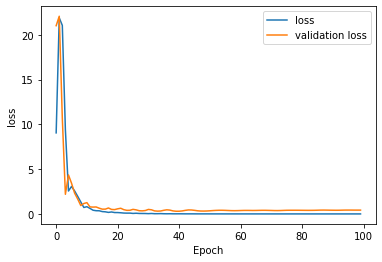

In [25]:
pp.plot_loss(hist2)

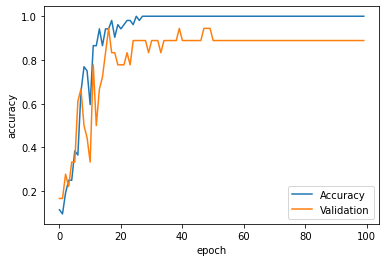

In [26]:
pp.plot_accuracy(hist2)